In [1]:
pip install numpy pandas matplotlib scikit-learn seaborn


Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score


In [5]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/blood-transfusion/transfusion.data"
df = pd.read_csv(url)
df.columns = ["Recency", "Frequency", "Monetary", "Time", "Donation"]
df.head()


,Recency,Frequency,Monetary,Time,Donation
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Recency    748 non-null    int64
 1   Frequency  748 non-null    int64
 2   Monetary   748 non-null    int64
 3   Time       748 non-null    int64
 4   Donation   748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB
None 
 Donation
0    0.762032
1    0.237968
Name: proportion, dtype: float64


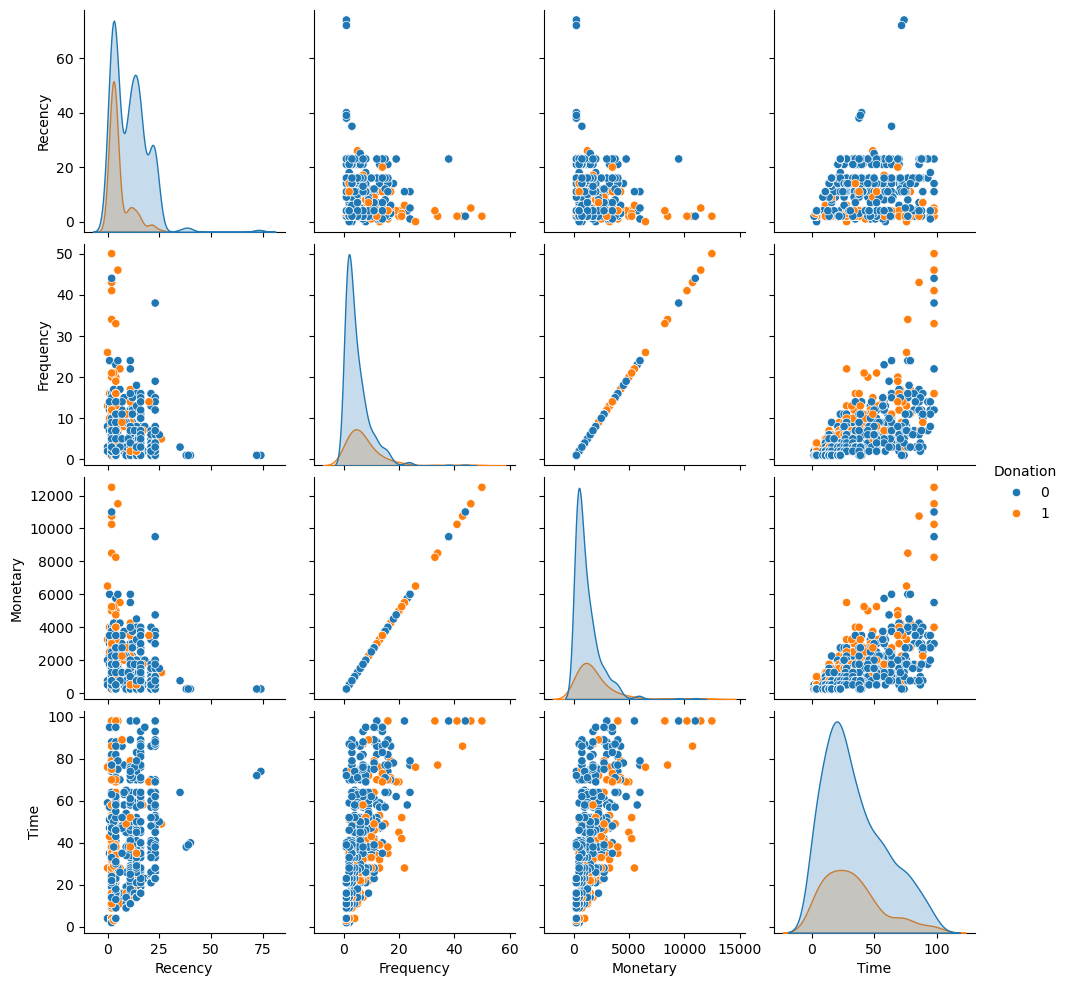

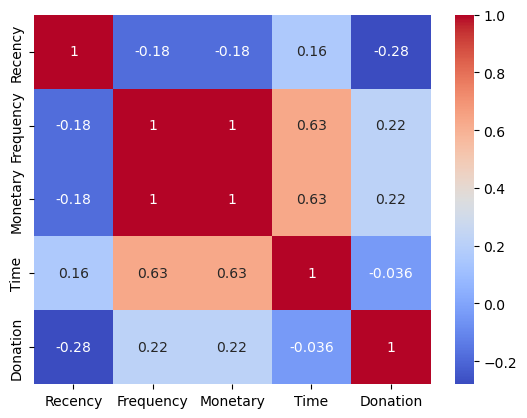

In [7]:
print(df.info(), "\n", df['Donation'].value_counts(normalize=True))

sns.pairplot(df, hue='Donation')
plt.show()

sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()


In [9]:
X = df.drop('Donation', axis=1)
y = df['Donation']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, stratify=y, random_state=42
)


In [11]:
lr = LogisticRegression()
lr_scores = cross_val_score(lr, X_train, y_train, cv=5, scoring='roc_auc')
print("Logistic Regression AUC:", lr_scores.mean())


Logistic Regression AUC: 0.7356917985232069


In [13]:
rf = RandomForestClassifier(random_state=42)
rf_scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='roc_auc')
print("Random Forest AUC:", rf_scores.mean())


Random Forest AUC: 0.6740741561181434


In [15]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 10, None]
}

grid = GridSearchCV(rf, param_grid, cv=5, scoring='roc_auc')
grid.fit(X_train, y_train)

best_rf = grid.best_estimator_
print("Best params:", grid.best_params_)
print("Best AUC:", grid.best_score_)


Best params: {'max_depth': 3, 'n_estimators': 100}
Best AUC: 0.7174741033755274


              precision    recall  f1-score   support

           0       0.77      0.99      0.87       171
           1       0.67      0.07      0.13        54

    accuracy                           0.77       225
   macro avg       0.72      0.53      0.50       225
weighted avg       0.75      0.77      0.69       225

ROC‑AUC: 0.7612085769980507


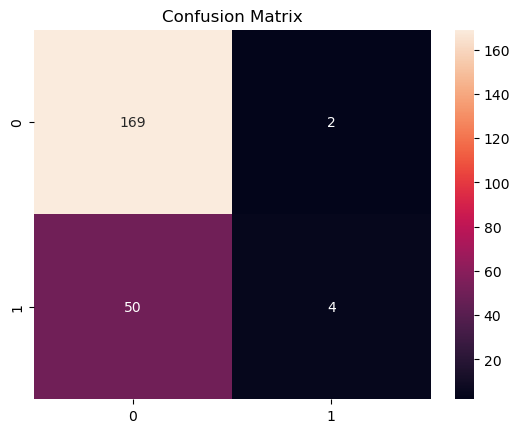

In [17]:
y_pred = best_rf.predict(X_test)
y_proba = best_rf.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred))
print("ROC‑AUC:", roc_auc_score(y_test, y_proba))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()


Recency : 0.4335093391788351
Frequency : 0.19910168671137593
Monetary : 0.19164305228120582
Time : 0.1757459218285832


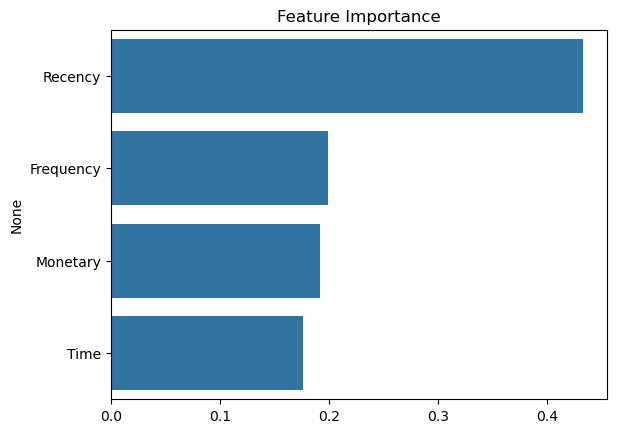

In [19]:
importance = best_rf.feature_importances_
for feat, imp in zip(X.columns, importance):
    print(feat, ":", imp)

sns.barplot(x=importance, y=X.columns)
plt.title("Feature Importance")
plt.show()


In [21]:
import joblib
joblib.dump(best_rf, "blood_donation_model.pkl")


['blood_donation_model.pkl']